In [1]:
import numpy as np
import matplotlib.pyplot as plt

with np.load('prediction-challenge-02-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2. INDEX: COLOR CHANNELS (3)
# 3/4. INDEX: PIXEL VALUE (32 x 32)
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)

# TRAIN MODEL ON data_x, data_y

# PREDICT prediction FROM test_x

plt.imshow(data_x[12,0])
print(data_y[12])

import numpy as np
NUM_CLASSES = np.size(np.unique(data_y))

(6000, 3, 32, 32) float32
(6000,) int64
(300, 3, 32, 32) float32
1


In [2]:

data_xx = data_x.reshape(6000, 32,32,3)
print(data_xx.shape)

test_xx = test_x.reshape(300, 32,32,3)
print(test_xx.shape)

(6000, 32, 32, 3)
(300, 32, 32, 3)


In [ ]:
plt.imshow(data_xx[9])


In [ ]:
plt.imshow(data_x[0])

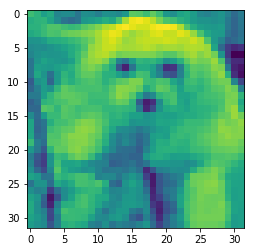

In [3]:
data_x2 = data_x/255 - 0.5
test_x2 = test_x/255 - 0.5

plt.imshow(data_x2[0,0])

In [ ]:
plt.imshow(data_x[1,0])

In [4]:
import keras
from keras import backend as K

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

/home/gaini/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    
    model = Sequential()  # start feed-forward model definition
    model.add(Conv2D(16, (3, 3),input_shape=( 32, 32, 3), padding="same" ) ) # first layer needs to define "input_shape"
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding="same" ) )
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3, 3), padding="same" ))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding="same" ) )
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    
    
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES))
  # here comes a bunch of convolutional, pooling and dropout layers

    
#    model.add(Dense(NUM_CLASSES))  # the last layer with neuron for each class
#    model.add(LeakyReLU(0.1))
    model.add(Activation("softmax"))  # output probabilities

    
    return model

In [8]:
# describe model
K.clear_session()  # clear default graph
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [9]:
y_binary = keras.utils.to_categorical(data_y)

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 15

K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

# fit model
model.fit(
    data_xx, y_binary,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/15
6000/6000 [==============================] - 39s 6ms/step - loss: 0.9917 - acc: 0.4835
Epoch 2/15
6000/6000 [==============================] - 36s 6ms/step - loss: 0.8470 - acc: 0.5907
Epoch 3/15
6000/6000 [==============================] - 36s 6ms/step - loss: 0.7919 - acc: 0.6257
Epoch 4/15
6000/6000 [==============================] - 36s 6ms/step - loss: 0.7277 - acc: 0.6643
Epoch 5/15
6000/6000 [==============================] - 36s 6ms/step - loss: 0.7084 - acc: 0.6758
Epoch 6/15
6000/6000 [==============================] - 37s 6ms/step - loss: 0.6610 - acc: 0.6973
Epoch 7/15
6000/6000 [==============================] - 37s 6ms/step - loss: 0.6288 - acc: 0.7128
Epoch 8/15
6000/6000 [==============================] - 37s 6ms/step - loss: 0.6035 - acc: 0.7237
Epoch 9/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.5642 - acc: 0.7507
Epoch 10/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.5294 - acc: 0.7712
Epoch 11/15
6000/60

In [11]:
prediction = model.predict(test_xx)
prediction_1 = np.argmax(prediction, axis = 1).reshape(300, )
print(prediction_1)

[1 2 1 2 0 0 2 1 2 1 0 1 1 2 0 2 0 2 0 2 0 2 0 0 1 1 0 0 2 0 2 2 1 1 2 1 0
 2 2 2 1 2 2 2 2 0 0 2 2 0 2 0 0 0 2 2 2 2 0 0 2 2 1 1 0 1 2 1 2 2 0 0 2 2
 2 0 2 2 0 1 0 0 0 1 0 0 0 0 2 2 0 2 2 0 1 1 0 1 0 1 2 0 0 0 1 2 0 1 2 0 1
 1 1 0 2 2 0 0 1 0 1 2 0 2 2 2 2 0 2 2 0 2 1 1 1 2 2 2 2 2 2 1 1 2 0 1 2 2
 0 1 2 2 0 0 2 1 2 0 1 1 0 1 2 0 1 1 2 0 0 2 2 0 0 2 0 0 1 1 0 1 1 0 1 1 0
 1 2 0 0 0 2 0 0 0 1 0 1 0 2 2 0 0 0 0 1 1 0 0 2 0 2 2 2 2 2 0 0 2 2 0 2 2
 0 0 2 0 0 1 2 2 1 1 0 0 0 0 0 0 1 2 0 2 2 0 0 0 2 1 0 1 0 1 0 0 2 0 1 2 1
 2 1 1 0 2 2 1 2 1 0 2 2 2 2 1 1 0 1 2 1 1 1 2 2 1 1 2 2 2 2 0 2 2 0 2 2 1
 0 2 2 1]


1

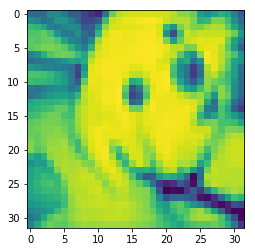

In [20]:
plt.imshow(test_x[25,0])
prediction_1[25]

In [21]:
# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction_1.ndim == 1
assert prediction_1.shape[0] == 300

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction_1)